In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
import pickle
import os

palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='whitegrid', font="cmr10", font_scale=1.0)
plt.rcParams['axes.formatter.use_mathtext'] = True

# from pkl

In [2]:
dfs = []
for monkey in ['V', 'W']:
    for session in [0,1,2,3]:
        for bid in range(1, 25):
            try:
                file = f"monkey{monkey}_session{session}_block{bid}"
                sim = pd.read_pickle(f'data/spikes/{file}_values.pkl')
                emp = pd.read_pickle("data/empirical.pkl").query("monkey==@monkey & session==@session & bid==@bid")
                sim['monkey_accuracy'] = emp['monkey_accuracy'].to_numpy()
                dfs.append(sim)
            except:
                print("missing", monkey, session, bid)
acc = pd.concat(dfs, ignore_index=True)

missing W 0 10
missing W 2 12


In [4]:
acc

,monkey,session,bid,before,after,va,vb,vl,vr,wab,wlr,al,ar,acc,clet,cloc,monkey_accuracy
0,V,0,1,1,None,0.003083,0.005001,0.000700,0.000357,0.494717,0.497001,-0.040731,0.027321,1,1,1,1
1,V,0,1,2,None,-0.019832,0.095949,0.005651,0.129335,0.463347,0.531410,0.008889,0.089710,0,0,1,0
2,V,0,1,3,None,-0.135865,0.063845,-0.015430,-0.031075,0.438738,0.555522,-0.010174,-0.022386,1,1,0,1
3,V,0,1,4,None,-0.114701,0.182442,0.113481,-0.025853,0.436066,0.560285,0.124314,0.004856,1,1,0,1
4,V,0,1,5,None,-0.105665,0.302603,0.230494,-0.021377,0.440826,0.555542,0.046670,0.088312,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,W,3,24,None,33,0.521062,-0.129575,0.095247,0.215729,0.759950,0.232529,0.007552,0.595132,0,0,1,1
15196,W,3,24,None,34,0.645520,-0.147962,0.071511,0.339119,0.769628,0.223148,0.001629,0.775519,0,0,1,1
15197,W,3,24,None,35,0.485541,-0.127456,0.026712,0.195561,0.775834,0.215437,0.444239,-0.020505,1,0,0,1
15198,W,3,24,None,36,0.602857,-0.137779,0.197347,0.200654,0.783766,0.209622,0.539438,-0.032590,1,0,0,1


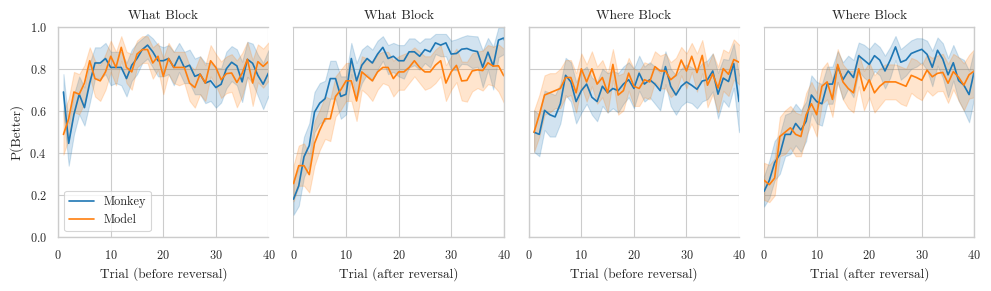

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(10, 3))
sns.lineplot(acc.query("bid<13"), x='before', y='monkey_accuracy', color=palette[0], ax=axes[0], label='Monkey')
sns.lineplot(acc.query("bid<13"), x='after', y='monkey_accuracy', color=palette[0], ax=axes[1])
sns.lineplot(acc.query("bid>=13"), x='before', y='monkey_accuracy', color=palette[0], ax=axes[2])
sns.lineplot(acc.query("bid>=13"), x='after', y='monkey_accuracy', color=palette[0], ax=axes[3])
sns.lineplot(acc.query("bid<13"), x='before', y='acc', color=palette[1], ax=axes[0], label='Model')
sns.lineplot(acc.query("bid<13"), x='after', y='acc', color=palette[1], ax=axes[1])
sns.lineplot(acc.query("bid>=13"), x='before', y='acc', color=palette[1], ax=axes[2])
sns.lineplot(acc.query("bid>=13"), x='after', y='acc', color=palette[1], ax=axes[3])
axes[0].legend()
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='What Block', xlim=(0, 40), ylim=(0,1))
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()
fig.savefig("plots/compare_accuracy.jpg", dpi=600)

# from npz

In [64]:
with open('data/spikes/reversals.pkl', 'rb') as f:
    reversals = pickle.load(f)

dfs = []
columns = ['type', 'monkey', 'session', 'block', 'before', 'after', 'accuracy']
for monkey in ['V', 'W']:
    for session in [0,1,2,3]:
        file = f"monkey{monkey}_session{session}"
        mat = scipy.io.loadmat(f'data/spikes/{file}_values.mat')
        before = reversals[f"monkey{monkey}_session{session}"]['before']
        after = reversals[f"monkey{monkey}_session{session}"]['after']
        block = reversals[f"monkey{monkey}_session{session}"]['block']
        for mt in ['monkey', 'model']:
            df = pd.DataFrame(columns=columns)
            df['type'] = [mt for _ in range(block.shape[0])]
            df['monkey'] = [monkey for _ in range(block.shape[0])]
            df['session'] = [session for _ in range(block.shape[0])]
            df['block'] = block
            df['before'] = before
            df['after'] = after
            if mt=='model':
                acc = mat['acc'][0]
            elif mt=='monkey':
                acc = reversals[f"monkey{monkey}_session{session}"]['monkey_acc']
            df['accuracy'] = acc
            dfs.append(df)
acc = pd.concat(dfs, ignore_index=True)

# plot

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(10, 3))
sns.lineplot(acc, x='before', y='accuracy', hue='type', palette=palette[:2], ax=axes[0])
sns.lineplot(acc, x='after', y='accuracy', hue='type', palette=palette[:2], ax=axes[1])
sns.lineplot(acc, x='before', y='accuracy', hue='type', palette=palette[:2], ax=axes[2])
sns.lineplot(acc, x='after', y='accuracy', hue='type', palette=palette[:2], ax=axes[3])
axes[0].legend()
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='What Block', xlim=(0, 40), ylim=(0, 1))
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()
fig.savefig("plots/compare_accuracy.jpg", dpi=600)

## Create reversals data file from my other data file

In [59]:
empirical = pd.read_pickle("data/empirical.pkl")
reversal_dict = {}
for monkey in ['V', 'W']:
    for session in [0,1,2,3]:
        before = []
        after = []
        block = []
        monkey_acc = []
        for bid in range(1, 24+1):
            if os.path.exists(f'data/spikes/monkey{monkey}_session{session}_block{bid}_values.npz'):
                for trial in empirical.query("monkey==@monkey & session==@session & bid==@bid")['trial'].unique():
                    reversal_at_trial = empirical.query("monkey==@monkey & session==@session & bid==@bid")['reversal_at_trial'].unique()[0]
                    before.append(int(trial) if trial<reversal_at_trial else None)
                    after.append(int(trial - reversal_at_trial) if trial>=reversal_at_trial else None)
                    block.append("what" if bid<=12 else "where")
                    monkey_acc.append(empirical.query("monkey==@monkey & session==@session & bid==@bid & trial==@trial")['monkey_accuracy'].to_numpy())
            else:
                print("missing values", monkey, session, bid)
        reversal_dict[f"monkey{monkey}_session{session}"] = {
            'before': np.array(before),
            'after': np.array(after),
            'block': np.array(block),
            'monkey_acc': np.array(monkey_acc).flatten()
        }
with open('data/spikes/reversals.pkl', 'wb') as f:
    pickle.dump(reversal_dict, f)

missing values W 0 10
missing values W 0 18
missing values W 0 19
missing values W 0 20
missing values W 0 21
missing values W 0 22
missing values W 0 23
missing values W 0 24
missing values W 2 12


In [70]:
pd.read_pickle("data/empirical.pkl")

,monkey,session,block,trial,left,right,correct,reversal_at_trial,monkey_accuracy,bid
0,V,0,where,1,A,B,left,42,1,19
1,V,0,where,2,A,B,left,42,0,19
2,V,0,where,3,A,B,left,42,0,19
3,V,0,where,4,B,A,left,42,0,19
4,V,0,where,5,B,A,left,42,1,19
...,...,...,...,...,...,...,...,...,...,...
15195,W,3,what,76,B,A,left,42,0,2
15196,W,3,what,77,A,B,right,42,1,2
15197,W,3,what,78,B,A,left,42,0,2
15198,W,3,what,79,B,A,left,42,0,2
